### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RAW de MI-EEG con CNN-1D + GRU
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 1000))
x_test = x_test.reshape((n_samples_test, 1, 22, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 1000)
(288, 1, 22, 1000)


In [0]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1000, 22)
(288, 1, 1000, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 313us/sample - loss: 2.0519 - acc: 0.4757
kappa:  0.30092592592592593
confusion matrix:
 [[39 12 10 11]
 [10 23 14 25]
 [ 5 16 25 26]
 [ 1 17  4 50]]
(0.4913632219611687, 0.4756944444444444, 0.47155572944686264, None)


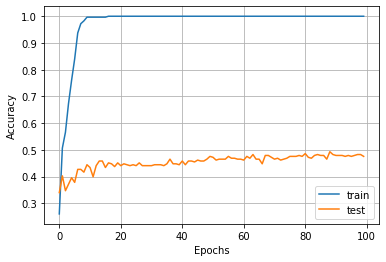

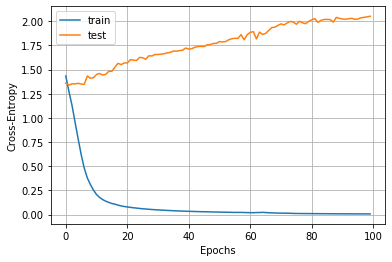

Iteration: 2
288/288 [==============================] - 0s 312us/sample - loss: 2.2525 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[45 10  7 10]
 [ 8 14 25 25]
 [ 5 18 30 19]
 [ 2  7 22 41]]
(0.45610902255639096, 0.4513888888888889, 0.44721412229577717, None)


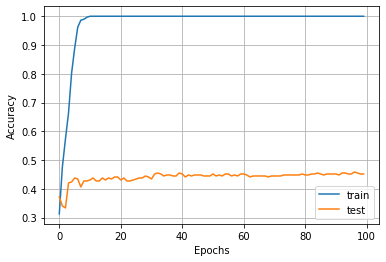

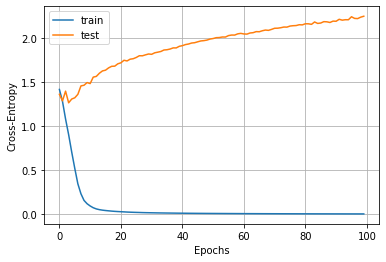

Iteration: 3
288/288 [==============================] - 0s 274us/sample - loss: 2.2883 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[35 15 17  5]
 [ 7 28 15 22]
 [ 8 19 25 20]
 [ 3 14 26 29]]
(0.4278955444419186, 0.40625, 0.4132127288578901, None)


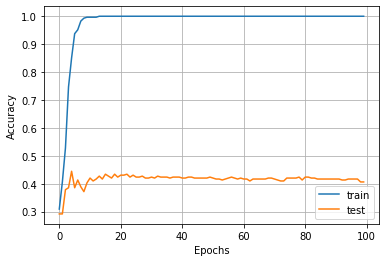

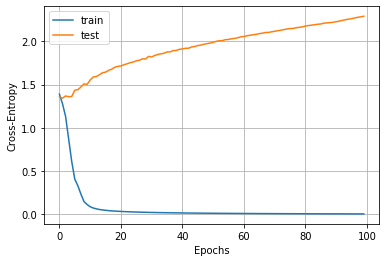

Iteration: 4
288/288 [==============================] - 0s 263us/sample - loss: 2.2151 - acc: 0.4653
kappa:  0.2870370370370371
confusion matrix:
 [[37 12 14  9]
 [ 8 28 15 21]
 [ 9 17 26 20]
 [ 5 14 10 43]]
(0.47096260816218616, 0.4652777777777778, 0.4643170131998348, None)


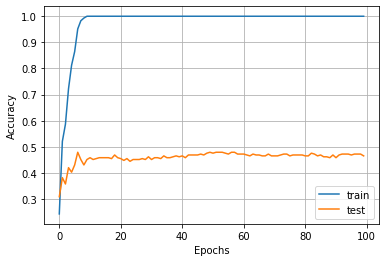

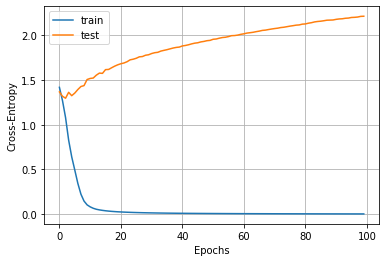

Iteration: 5
288/288 [==============================] - 0s 254us/sample - loss: 2.5435 - acc: 0.3958
kappa:  0.19444444444444442
confusion matrix:
 [[31 14 13 14]
 [ 8 20 13 31]
 [ 7 23 23 19]
 [ 4 16 12 40]]
(0.4139092919207449, 0.3958333333333333, 0.39611722661914567, None)


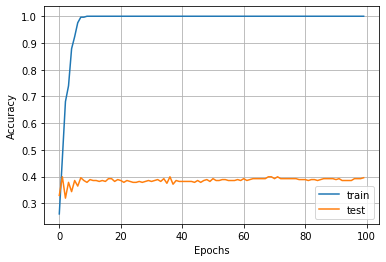

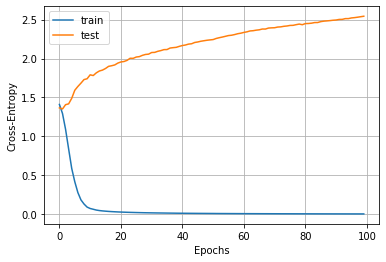

Iteration: 6
288/288 [==============================] - 0s 305us/sample - loss: 2.2615 - acc: 0.3993
kappa:  0.19907407407407407
confusion matrix:
 [[36 19 15  2]
 [ 8 24 19 21]
 [ 5 21 22 24]
 [ 5 16 18 33]]
(0.41911599099099095, 0.3993055555555555, 0.40569960861056753, None)


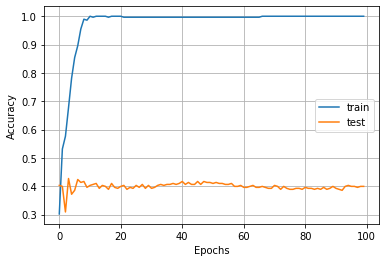

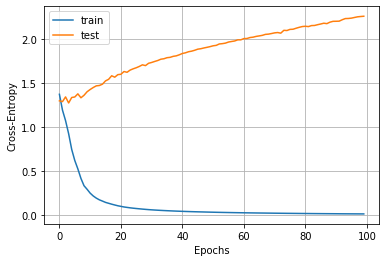

Iteration: 7
288/288 [==============================] - 0s 282us/sample - loss: 2.1645 - acc: 0.4097
kappa:  0.2129629629629629
confusion matrix:
 [[34 17 15  6]
 [ 9 22 18 23]
 [ 5 25 25 17]
 [ 4 17 14 37]]
(0.42961411171752534, 0.4097222222222222, 0.4151525932953826, None)


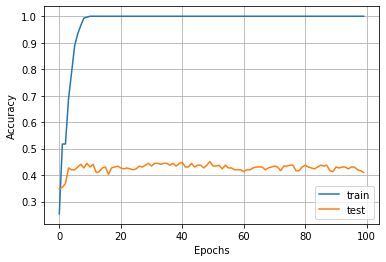

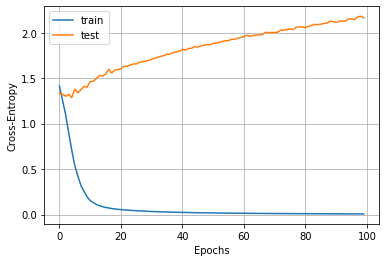

Iteration: 8
288/288 [==============================] - 0s 291us/sample - loss: 2.3985 - acc: 0.4132
kappa:  0.21759259259259256
confusion matrix:
 [[41 14 11  6]
 [12 19 14 27]
 [ 9 19 25 19]
 [ 3 22 13 34]]
(0.41992505539017166, 0.4131944444444444, 0.4148910589484886, None)


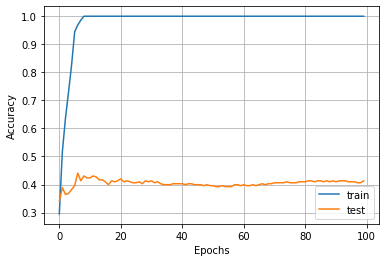

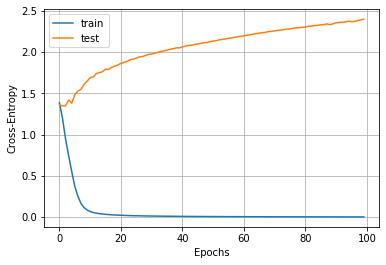

Iteration: 9
288/288 [==============================] - 0s 287us/sample - loss: 2.1030 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[37 15 14  6]
 [ 5 26 10 31]
 [ 4 19 29 20]
 [ 1 16 11 44]]
(0.5045269675168805, 0.4722222222222222, 0.4770852998284144, None)


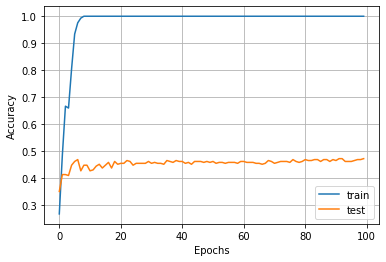

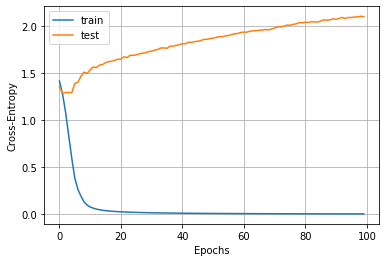

Iteration: 10
288/288 [==============================] - 0s 279us/sample - loss: 2.2712 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[39 16 12  5]
 [ 7 25 19 21]
 [ 7 13 28 24]
 [ 4 14 16 38]]
(0.4642522750727085, 0.45138888888888884, 0.45443660022148397, None)


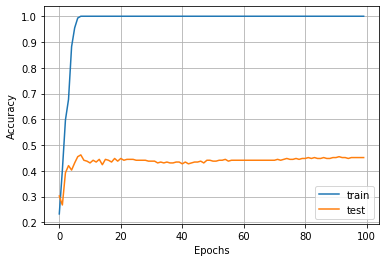

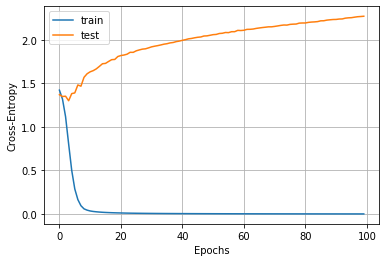


Resultados:
loss: [2.0519104401270547, 2.252516163720025, 2.28828063276079, 2.21513205104404, 2.543492237726847, 2.2615219751993814, 2.164496315850152, 2.398493766784668, 2.1030168665779962, 2.271164443757799]
accuracy: [0.47569445, 0.4513889, 0.40625, 0.4652778, 0.39583334, 0.39930555, 0.4097222, 0.41319445, 0.4722222, 0.4513889]
kappa: [0.30092592592592593, 0.2685185185185185, 0.20833333333333337, 0.2870370370370371, 0.19444444444444442, 0.19907407407407407, 0.2129629629629629, 0.21759259259259256, 0.2962962962962963, 0.2685185185185185]
precision: [0.4913632219611687, 0.45610902255639096, 0.4278955444419186, 0.47096260816218616, 0.4139092919207449, 0.41911599099099095, 0.42961411171752534, 0.41992505539017166, 0.5045269675168805, 0.4642522750727085]
recall: [0.4756944444444444, 0.4513888888888889, 0.40625, 0.4652777777777778, 0.3958333333333333, 0.3993055555555555, 0.4097222222222222, 0.4131944444444444, 0.4722222222222222, 0.45138888888888884]
f1: [0.47155572944686264, 0.447214122

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(8, 11, activation='relu'), input_shape=(None,1000,22)))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
    model.add(TimeDistributed(MaxPool1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(16))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_63 (TimeDis (None, None, 990, 8)      1944      
_________________________________________________________________
time_distributed_64 (TimeDis (None, None, 495, 8)      0         
_________________________________________________________________
time_distributed_65 (TimeDis (None, None, 485, 16)     1424      
_________________________________________________________________
time_distributed_66 (TimeDis (None, None, 242, 16)     0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, None, 232, 16)     2832      
_________________________________________________________________
time_distributed_68 (TimeDis (None, None, 116, 16)     0         
_________________________________________________________________
time_distributed_69 (TimeDis (None, None, 1856)       

In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4340
std: (+/- 0.0304)
kappa: 0.2454
std: 0.0405
precision: 0.4498
recall: 0.4340
f1: 0.4360
